# **Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Load the dataset
df = pd.read_csv('C:/Users/ram/Downloads/enhanced_box_office_data(2000-2024)u.csv')
df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [4]:
df.shape

(5000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


In [6]:
df.describe()

,Rank,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Vote_Count
count,5000.00000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,4830.000000
mean,100.50000,1.192137e+08,4.472523e+07,35.740620,7.448809e+07,64.256640,2012.000000,2531.585921
std,57.74008,2.005243e+08,7.727026e+07,30.656992,1.334932e+08,30.654531,7.211824,3946.272827
min,1.00000,1.666028e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000,0.000000
25%,50.75000,2.466220e+07,9.275150e+04,0.200000,1.371034e+07,42.200000,2006.000000,205.250000
50%,100.50000,4.844658e+07,1.798421e+07,37.050000,3.019444e+07,62.950000,2012.000000,1035.500000
75%,150.25000,1.197588e+08,5.386847e+07,57.800000,7.211578e+07,99.800000,2018.000000,3065.000000
max,200.00000,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000,2024.000000,36753.000000


In [7]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Rank                      0
Release Group             0
$Worldwide                0
$Domestic                 0
Domestic %                0
$Foreign                  0
Foreign %                 0
Year                      0
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64


In [8]:
#drop missing values
df = df.dropna()

In [9]:
# Check for duplicates
print("\nDuplicated rows:")
print(df.duplicated().sum())


Duplicated rows:
0


In [10]:
df.shape

(4797, 13)

In [11]:
df['Rating']=df['Rating'].str.replace('/10',"").astype(float)

In [12]:
df['Genres'] = df['Genres'].astype('category').cat.codes
df = df.drop(columns=['Rank', 'Original_Language', 'Production_Countries'])
df.head()

,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count
0,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,247,6.126,6741.0
1,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,131,8.217,19032.0
2,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,283,7.663,11403.0
3,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,638,6.450,3944.0
4,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,458,6.544,2530.0


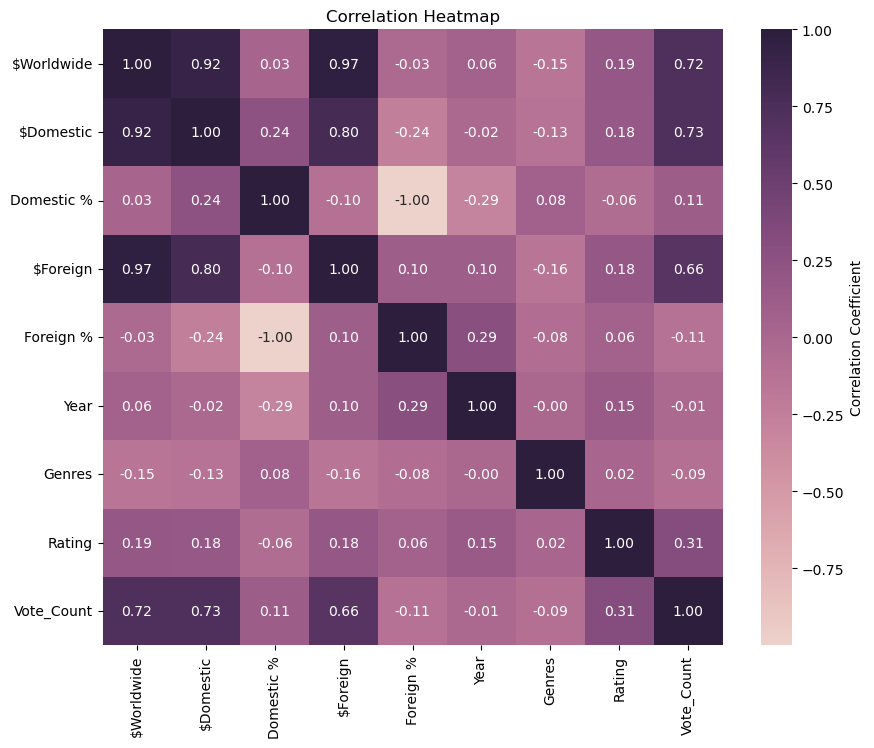

In [13]:
cubehelix_cmap = sns.cubehelix_palette(as_cmap=True)
df_selected = df.drop(columns=['Release Group'])
corr_matrix = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cubehelix_cmap, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png')
plt.show()

In [14]:
#Select features and target 
X = df[['$Domestic', '$Foreign']]
y = df['$Worldwide']

In [15]:
#Scalinig
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

In [16]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Multiple linear Regression Model**

In [18]:
class MultipleLinearRegression:
    def __init__(self):
        self.x = None
        self.y = None
        self.p = None
        self.SSE = None
        self.SSR = None
        self.SST = None
        self.MSE = None
        self.MSR = None
        self.R2 = None
        self.R2_adj = None
        self.df_error = None
        self.X_matrix = None
        self.B = None
        self.XTX_inverse = None

    def fit(self, x, y):
        self.n, self.k = x.shape
        self.X = np.array(x)
        self.y = np.array(y)
        self.y_bar = self.y.mean()
        self.p = self.k + 1
        X = np.c_[np.ones((self.X.shape[0], 1)), self.X]
        self.X_matrix = X
        self.df_error = self.n - self.p
        self.XTX_inverse = np.linalg.inv(X.T @ X)
        XTy = X.T @ y
        self.B = self.XTX_inverse @ XTy
        y_pred = self.predict(X)
        self.SSE = (y.T @ y) - self.B.T @ XTy
        self.MSE = self.SSE / self.df_error
        self.SST = (y.T @ y) - self.n * self.y_bar**2
        self.SSR = self.SST - self.SSE
        self.R2 = self.SSR / self.SST
        self.R2_adj = 1 - (self.SSE / self.SST) * ((self.n - 1) / (self.n - self.p))

    def predict(self, x):
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")
        if x.shape[1] == len(self.B) - 1:
            x = np.c_[np.ones((x.shape[0], 1)), x]
        x = np.array(x)
        return x @ self.B

    def plot_regression_plane(self, X, y, model):
        X = np.array(X)
        y = np.array(y)
        if X.shape[1] != 2:
            raise ValueError("Plotting is only available for models with exactly two independent variables.")
        x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
        x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
        y_pred_grid = (
            model.B[0] +
            model.B[1] * x1_grid +
            model.B[2] * x2_grid
        )
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data points')
        ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5)
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Target")
        ax.set_title("Multiple Linear Regression - Regression Plane")
        plt.legend()
        plt.show()

    def anova_table(self):
        if self.B is None:
            raise ValueError("Model not fitted yet. Call .fit() first.")
        df_regression = 1
        df_error = self.n - 2
        df_total = self.n - 1
        MSR = self.SSR / df_regression
        MSE = self.SSE / df_error
        F_stat = MSR / MSE
        anova_data = {
            'Source': ['Regression', 'Error', 'Total'],
            'SS': [self.SSR, self.SSE, self.SST],
            'df': [df_regression, df_error, df_total],
            'MS': [MSR, MSE, np.nan],
            'F': [F_stat, np.nan, np.nan]
        }
        return pd.DataFrame(anova_data)

    def partial_f_test(self, predictors_to_test, alpha=0.05):
        cols_to_drop = [i - 1 for i in predictors_to_test]
        X_reduced = np.delete(self.X, cols_to_drop, axis=1)
        reduced_model = MultipleLinearRegression()
        reduced_model.fit(X_reduced, self.y)
        ssr_full = self.SSR
        ssr_reduced = reduced_model.SSR
        df_numerator = len(predictors_to_test)
        df_denominator = self.n - self.p
        numerator = (ssr_full - ssr_reduced) / df_numerator
        denominator = self.MSE
        f_stat = numerator / denominator
        critical_f = scipy.stats.f.ppf(1-alpha, df_numerator, df_denominator)
        betas = [f"β{i}" for i in predictors_to_test]
        beta_str = " = ".join(betas) + " = 0"
        alt_betas = " or ".join([f"{b} ≠ 0" for b in betas])
        print("\n--- Partial F-Test ---")
        print(f"Tested Predictors: {', '.join(betas)}")
        print("\nHypotheses:")
        print(f"H₀: {beta_str}")
        print(f"H₁: {alt_betas}")
        print("\nResults:")
        print(f"Calculated F-Statistic: {f_stat:.4f}")
        print(f"Critical F-Value at α = {alpha}: {critical_f:.4f}")
        print("\nConclusion:")
        if f_stat > critical_f:
            print(f"Reject H₀ → The predictor(s) {', '.join(betas)} *significantly* contribute to the model.")
        else:
            print(f"Fail to reject H₀ → The predictor(s) {', '.join(betas)} *do not* significantly contribute.")
        print("------------------------\n")

    def interval_estimation(self, alpha=0.05, sigma=None):
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")
        if sigma is None:
            t_value = scipy.stats.t.ppf(1 - alpha/2, df=self.n - self.p)
            errors = np.sqrt(np.diag(self.MSE * self.XTX_inverse))
        else:
            t_value = scipy.stats.norm.ppf(1 - alpha/2)
            errors = np.sqrt(np.diag(sigma**2 * self.XTX_inverse))
        intervals = []
        for b, se in zip(self.B, errors):
            lower = b - t_value * se
            upper = b + t_value * se
            intervals.append((lower, upper))
        return intervals

In [19]:
model = MultipleLinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_test = pd.DataFrame(X_test, columns=X.columns)  
df_test['predicted_Worldwide'] = y_pred
df_test.head(10)


,$Domestic,$Foreign,predicted_Worldwide
0,-0.485450,-0.518878,1.390499e+07
1,-0.408319,-0.461934,2.768524e+07
2,-0.473544,-0.330482,4.041679e+07
3,-0.588889,-0.382248,2.434255e+07
4,-0.588889,-0.269393,3.966458e+07
5,-0.559196,-0.399995,2.426179e+07
6,-0.580005,-0.194387,5.054472e+07
7,-0.588889,1.902446,3.345311e+08
8,-0.556601,-0.468817,1.512139e+07
9,0.394476,-0.189259,1.276666e+08


In [20]:
print("Evaluation of the model")
print("-----------------------")
weights=model.B
feature_count=len(weights)-1
equation=f"y={round(weights[0],2)}"
for i in range (1,feature_count+1):
    equation +=f"+{round(weights[i],2)}* x{i}"

print(f"line of the best fit is:{equation}")
print(f"the MSE is:{round(model.MSE,3)}")

Evaluation of the model
-----------------------
line of the best fit is:y=122424444.99+78427073.35* x1+135768106.63* x2
the MSE is:91810628.507


In [21]:
print("R²:", model.R2)
print("Adjusted R²:", model.R2_adj)

R²: 0.9999999978124059
Adjusted R²: 0.9999999978112647


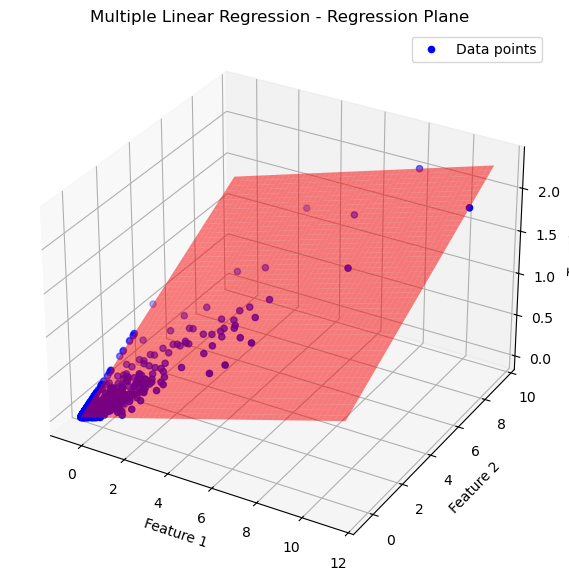

In [22]:
# Now plot the regression plane
model.plot_regression_plane(X_test,y_pred, model)

In [23]:
for feature in X:
    print(f"\nANOVA for {feature}:")
    X = df[[feature]].values  
    model = MultipleLinearRegression()
    model.fit(X_scaled, y)
    print(model.anova_table())


ANOVA for $Domestic:
       Source            SS    df            MS             F
0  Regression  1.992633e+20     1  1.992633e+20  2.712310e+12
1       Error  3.522709e+11  4795  7.346630e+07           NaN
2       Total  1.992633e+20  4796           NaN           NaN

ANOVA for $Foreign:
       Source            SS    df            MS             F
0  Regression  1.992633e+20     1  1.992633e+20  2.712310e+12
1       Error  3.522709e+11  4795  7.346630e+07           NaN
2       Total  1.992633e+20  4796           NaN           NaN


In [24]:
model.partial_f_test([1])
model.partial_f_test([2])


--- Partial F-Test ---
Tested Predictors: β1

Hypotheses:
H₀: β1 = 0
H₁: β1 ≠ 0

Results:
Calculated F-Statistic: 146998159105.0361
Critical F-Value at α = 0.05: 3.8434

Conclusion:
Reject H₀ → The predictor(s) β1 *significantly* contribute to the model.
------------------------


--- Partial F-Test ---
Tested Predictors: β2

Hypotheses:
H₀: β2 = 0
H₁: β2 ≠ 0

Results:
Calculated F-Statistic: 440529744459.9210
Critical F-Value at α = 0.05: 3.8434

Conclusion:
Reject H₀ → The predictor(s) β2 *significantly* contribute to the model.
------------------------



In [25]:
interval_estimation_result = model.interval_estimation(alpha=0.05)
for idx, (lower, upper) in enumerate(interval_estimation_result):
    print(f"95% CI for B_{idx}: [{lower:.4f}, {upper:.4f}]")

95% CI for B_0: [122424165.3882, 122424650.6681]
95% CI for B_1: [78426684.5086, 78427486.5521]
95% CI for B_2: [135767701.0201, 135768503.0635]
